In [50]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [51]:
%matplotlib inline

In [52]:
df = pd.read_csv('diabetes_data.csv')

In [53]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [55]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [56]:
right_data = df[['Age', 'Gender','class']]

In [57]:
right_data.head()

,Age,Gender,class
0,40,Male,Positive
1,58,Male,Positive
2,41,Male,Positive
3,45,Male,Positive
4,60,Male,Positive


In [60]:
def replace_gender(x):
    if x == "Male":
        return 1
    elif x == "Female":
        return 0

In [65]:
right_data['Gender'] = right_data['Gender'].apply(replace_gender)

<ipython-input-65-844192826a43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_data['Gender'] = right_data['Gender'].apply(replace_gender)


In [66]:
right_data.head()

,Age,Gender,class
0,40,1,Positive
1,58,1,Positive
2,41,1,Positive
3,45,1,Positive
4,60,1,Positive


In [67]:
left_data = df.drop(['Age', 'Gender', 'class'], axis=1)

In [68]:
left_data.head()

,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [69]:
def replace_data(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0

In [70]:
left_data = left_data.applymap(replace_data)

In [71]:
data = right_data.join(left_data)

In [72]:
data.head()

,Age,Gender,class,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,Positive,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,Positive,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,Positive,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,Positive,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,Positive,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [73]:
data['Age'].min()

16

In [74]:
data['Age'].max()

90

In [75]:
data.isnull().sum()

Age                   0
Gender                0
class                 0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
dtype: int64

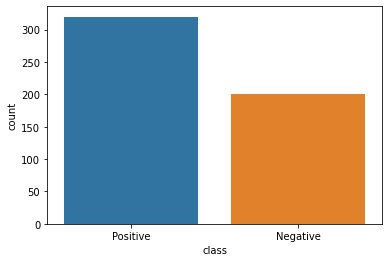

In [76]:
sns.countplot(data['class'])

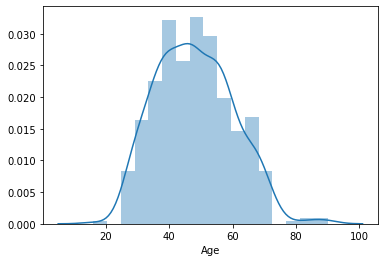

In [77]:
sns.distplot(data['Age'])

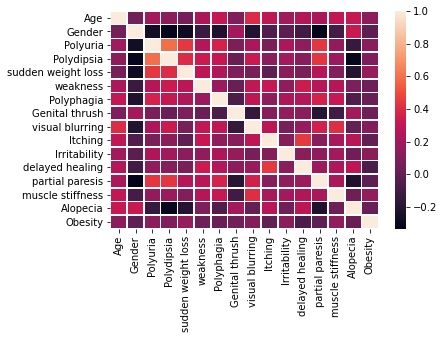

In [78]:
sns.heatmap(data.corr(), linewidths=.5)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [94]:
feature_cols =  ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']

In [95]:
X = data[feature_cols]
y = data['class']

In [96]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=42)
model = LogisticRegression().fit(X_train, y_train)

In [97]:
model.score(X_train, y_train)

0.9358974358974359

In [98]:
preds = model.predict(X_test)

In [99]:
shots = pd.Series(data=preds, name='Prediction')

In [100]:
res = pd.concat([y_test.reset_index(), shots], axis=1)[['class', 'Prediction']]

In [101]:
res.head()

,class,Prediction
0,Negative,Negative
1,Positive,Positive
2,Positive,Positive
3,Positive,Positive
4,Positive,Positive


In [102]:
res[res['class'] != res['Prediction']]

,class,Prediction
8,Positive,Negative
24,Negative,Positive
39,Negative,Positive
41,Negative,Positive
42,Positive,Negative
58,Positive,Negative
60,Negative,Positive
72,Positive,Negative
100,Negative,Positive
121,Positive,Negative


In [103]:
res.shape

(208, 2)

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
cm

array([[ 71,   5],
       [ 11, 121]], dtype=int64)

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9423076923076923

In [106]:
from sklearn.ensemble import RandomForestClassifier #Most accurate
rfc = RandomForestClassifier(n_estimators = 1000).fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9807692307692307